# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Módulo 1 - Aula 3 - Criando um modelo inicial

In [75]:
import pandas as pd

In [76]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso17_classificacao_validacao_de_modelos_metricas_de_avaliacao\\emp_automovel.csv')

Coluna inadimplente: 0 = pagou o empréstimo e 1 = não pagou o empréstimo (inadimplente).
Todos os dados são numéricos e toda a base de dados já está tratada.

In [77]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


Separar as colunas entre variáveis explicativas (x) e variável alvo (y)

In [78]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

Usar o algorítimo de árvore de decisão

In [79]:
from sklearn.tree import DecisionTreeClassifier

Vamos ajustar o algorítimo em um modelo, inicializar em uma variável "modelo", utilizando o método fit passando as variáveis explicativas e alvo que vai armazenar o padrão dos dados e vai conseguir classificar dados novos e comparar. O método score() tem a finalidade de comparar as previsões feitas pelo modelo com os valores reais dos dados e calcula uma taxa de acerto em porcentagem chamada de acurácia, que se der 1.0 = 100%.

In [80]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

Significa que o modelo não está errando em nenhum momento na classificação dos dados.

In [81]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


### Módulo 1 - Classificando dados - Aula 5 - Validando o modelo

In [82]:
from sklearn.model_selection import train_test_split

Depois de importada a função, podemos fazer a primeira separação. Vamos fazer a separação de treino e validação em um mesmo conjunto de dados, que será chamado de x. Esse conjunto substituirá o valor x existente. A outra parte será os dados de teste.

Portanto, vamos criar variáveis chamadas de x_test e y_test, que vão armazenar esses dados. Para separá-los, podemos escrever o seguinte:

x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

Agora, podemos fazer a subdivisão dos dados de treino e validação. Vamos utilizar a mesma função train_test_split, mas desta vez iremos usar os dados armazenados em x e y. Lembrando que esses não são os mesmos dados iniciais, pois substituímos o dado x e y por essas novas variáveis, ou seja, somente essa parte de treino e validação está sendo separada aqui agora entre treino e validação.

x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos abrir essa célula e passar o parâmetro stratify igual a y e o random_state igual a 5, isso para manter a proporção dos dados e garantir que o resultado que estamos construindo aqui seja o mesmo que você obterá nas vezes em que executar esse código.

In [83]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos iniciar nosso modelo escrevendo: modelo = DecisionTreeClassifier. Em seguida, ajustaremos nosso modelo escrevendo: modelo.fit, passando como parâmetros x_treino e y_treino. Dessa maneira, o modelo será ajustado, compreendendo o padrão dos dados apenas com base na sessão de treinamento.

In [84]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

Agora, utilizaremos a acurácia. Faremos duas acurácias diferentes, uma para o treinamento e outra para o teste, para conseguirmos comparar como o modelo performa utilizando os mesmos dados de treinamento e como se sai para dados novos.

In [85]:
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.851232471039108


Vamos copiar esse código da célula anterior, colar na célula abaixo e modificar esse parâmetro da árvore de decisão para max_depth igual a 10. Assim, estabeleceremos uma profundidade máxima de 10.

In [86]:
modelo = DecisionTreeClassifier(max_depth = 10) # Definindo a profundidade máxima da árvore com max_depth
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205574912891986
Acurácia de validação: 0.9061057399181256


### Módulo 1 - Classificando dados - Aula 7 - Avaliando o modelo

In [87]:
from sklearn.metrics import confusion_matrix

Criar a matriz de confusão.

A matriz de confusão nos informa a quantidade de acertos e erros para cada uma das categorias da variável alvo, ou seja, a quantidade de clientes que o modelo classificou como adimplentes e a quantidade de clientes que o modelo identificou como inadimplentes.

In [88]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  960    42]]


In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

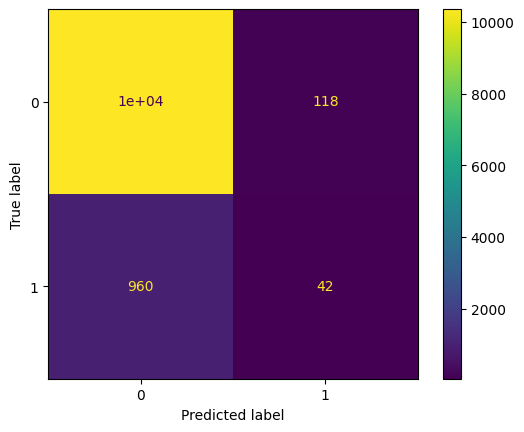

In [90]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

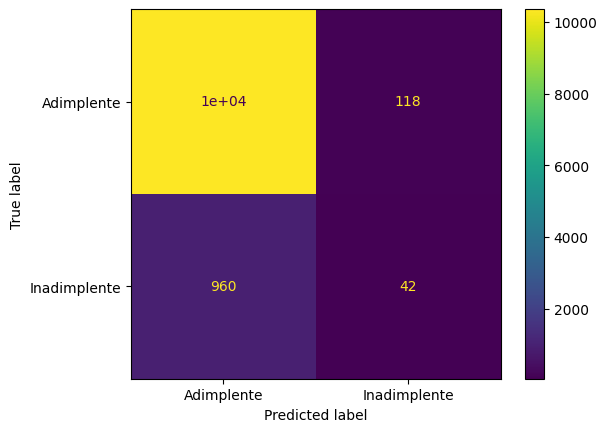

In [91]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [92]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


### Módulo 1 - Classificando dados - Aula 10 - Desafio: construindo um segundo modelo

É recomendado utilizar mais de um modelo de classificação em projetos de machine learning, para que sejam comparados os resultados e escolhido aquele modelo que tem um melhor desempenho, após todas as análises e aprimoramentos.

Utilizamos durante a aula o algoritmo de árvore de decisão, mas a biblioteca Scikit-Learn possui diversos outros métodos de classificação que podem ser utilizados no nosso projeto. Como desafio, utilize o algoritmo Random Forest para criar um modelo e avaliar o desempenho com a acurácia e a matriz de confusão, e compare os resultados com o resultado da árvore de decisão.

Como uma dica, vasculhe a documentação do algoritmo RandomForestClassifier. Explore este material e perceba como importar a função. Durante esse processo, lembre-se de checar os parâmetros do método para evitar que o modelo se ajuste muito aos dados de treinamento.

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Modelo Random Forest
modelo_rf = RandomForestClassifier(max_depth=10)
# Treinamento do modelo
modelo_rf.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=10)

In [95]:
# Visualização da acurácia
print(f'Acurácia de treino: {modelo_rf.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(x_val, y_val)}')

Acurácia de treino: 0.915534262485482
Acurácia de validação: 0.9129866736347008


In [96]:
# Avaliação do modelo
y_previsto_rf = modelo_rf.predict(x_val)
# Matriz de confusão
matriz_confusao_rf = confusion_matrix(y_val, y_previsto_rf)

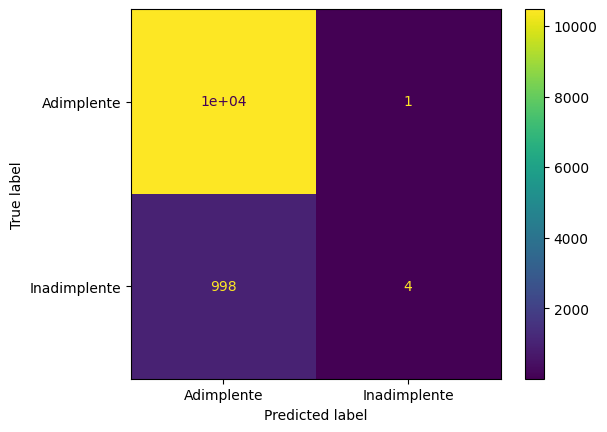

In [97]:
# Visualização da matriz de confusão
visualizacao_rf = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_rf, display_labels=['Adimplente', 'Inadimplente'])
visualizacao_rf.plot();

### Módulo 2 - Métricas de avaliação - Aula 2 - Acurácia, precisão e recall

Para extrair essas métricas, iremos analisar uma representação da matriz de confusão.

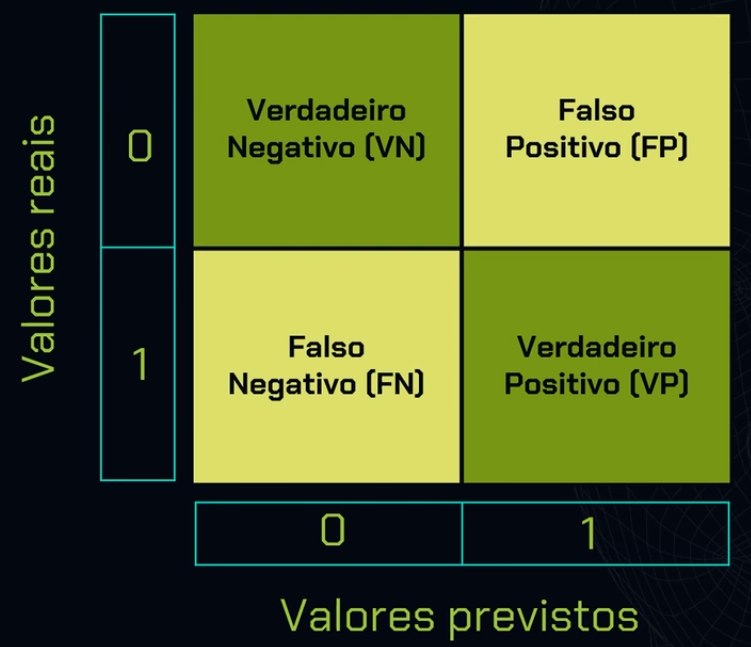

Nas linhas, temos os valores reais do conjunto de dados, enquanto nas colunas, temos os valores previstos pelo modelo.

Vamos identificar a classe 0 e a classe 1 da variável alvo, com o 0 representando a ausência de uma determinada característica, e o 1 representando a presença da característica.

No caso, que está relacionado à inadimplência, o 1 representa a presença de inadimplência (clientes inadimplentes) e o 0 representa a ausência dessa característica (pessoas adimplentes que pagam em dia).

0: adimplência
1: inadimplência

Além disso, cada um dos valores da matriz de confusão pode ser interpretado com uma nomenclatura, a partir desse cruzamento de valores.

O primeiro valor na primeira linha e primeira coluna corresponde aos "verdadeiros negativos", onde tanto os valores reais quanto os valores previstos pelo modelo indicam a ausência da característica.

Na primeira linha e segunda coluna, encontram-se os "falsos positivos", onde os valores reais indicam a ausência da característica, enquanto os valores previstos indicam a presença. 

Na segunda linha e primeira coluna, temos os "falsos negativos", em que os valores reais representam a presença da característica, e os valores previstos indicam a ausência.

Por fim, na segunda linha e segunda coluna, estão os "verdadeiros positivos", em que tanto os valores reais quanto os previstos pelo modelo indicam a presença da característica.

In [98]:
from sklearn.metrics import accuracy_score

Para extrair a acurácia, que é a métrica que já conhecemos da taxa de acerto geral. Vamos avaliar os acertos do modelo dividido por todas as previsões realizadas pelo modelo.

Portanto, somamos os verdadeiros negativos e verdadeiros positivos e dividimos pela soma de todas as previsões, ou seja, os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

In [99]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9061057399181256


In [100]:
from sklearn.metrics import precision_score, recall_score

### Métrica de Precisão

A primeira métrica que podemos extrair é a precisão, que considera somente os valores previstos pelo modelo que representam a presença da característica.

Portanto, vamos avaliar a segunda coluna da nossa matriz. Para calcular a precisão, pegamos os verdadeiros positivos e dividimos pela soma da segunda coluna, que são os falsos positivos e verdadeiros positivos.

Dessa maneira, obtemos a precisão, que é um valor entre 0 e 1. Quanto mais próximo de 1, melhor será o resultado dessa métrica.

### Métrica de Recall

Esta métrica, considera apenas os valores reais em que a característica está presente.

Desta forma, iremos avaliar exclusivamente a segunda linha da matriz de confusão. Para calcular o recall, pegamos os verdadeiros positivos e dividimos pela soma da segunda linha, que consistirá nos falsos negativos mais os verdadeiros positivos.

In [101]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.2625
Recall: 0.041916167664670656


### Reflexão

Agora, podemos identificar qual é a métrica mais relevante para o nosso problema: será a precisão ou o recall? 

Para entender isso, precisamos questionar:

O que é mais prejudicial para a empresa: incorrer em prejuízo financeiro ou deixar de vender para um cliente? 

Muito provavelmente é incorrer em prejuízo financeiro.

### Conclusão

Portanto, a métrica que avaliará se a empresa não vai incorrer em tanto prejuízo financeiro é a taxa de recall, já que ela avalia os valores reais de pessoas inadimplentes.

Quanto maior a quantidade de falsos negativos, mais clientes a empresa irá considerar como bons pagadores, sendo que, na verdade, esses clientes são inadimplentes. No caso da precisão, quanto melhor for seu valor, menos clientes serão perdidos.

In [102]:
from sklearn.metrics import f1_score

Esta métrica, conhecida como F1 Score (pontuação F1). Essa métrica representa um equilíbrio entre a precisão e o recall. É calculada como duas vezes a precisão vezes o recall, dividido pela soma entre precisão e recall.

Essa métrica é utilizada quando desejamos equilibrar a não perda de clientes com a inexistência de prejuízos. Isso se aplica ao nosso projeto específico, mas em outros projetos de classificação, o entendimento será diferente, sendo o F1 Score o equilíbrio entre essas duas métricas.

In [103]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07228915662650602


### Módulo 2 - Métricas de avaliação - Aula 4 - Curva ROC

A métrica da curva ROC, gera um gráfico, usado para avaliar se nosso modelo consegue fazer uma distinção eficaz entre as classes, isto é, entre pessoas clientes que estão em dia com seus pagamentos e pessoas clientes que estão inadimplentes.

Essa curva ROC é construída usando a métrica recall e outra métrica derivada da matriz de confusão. Se voltarmos um pouco ao nosso projeto, a outra métrica usada para a construção da curva ROC é a taxa de falsos positivos.

Ela é calculada pela quantidade de falsos positivos, dividido pela soma de verdadeiros negativos e falsos positivos. Assim, vamos usar esta métrica e recall para a construção desse gráfico e a avaliação do nosso modelo será feita a partir dessas duas métricas.

In [105]:
from sklearn.metrics import RocCurveDisplay

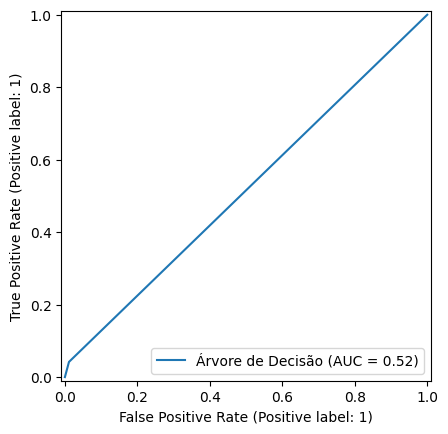

In [106]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

A métrica conhecida como AUC, pode ser calculada a partir da curva ROC. Quanto mais próximo de 1 for o valor do AUC, melhor será o desempenho do modelo, enquanto valores mais próximos de 0,5 indicam um desempenho pior, pois a curva estará mais próxima da linha diagonal.

Podemos analisar esse gráfico de duas formas, tanto o gráfico em si, quanto a métrica que é extraída a partir desse gráfico. E essa métrica é calculada pela área abaixo do gráfico. Então, esse AUC quer dizer Area Under the Curve (Área Sob a Curva).

In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5153277755968168


Conclusão

Agora, nós aprendemos como avaliar o nosso modelo usando a curva ROC e a métrica AUC e notamos que o nosso modelo não está se saindo tão bem na diferenciação entre as classes.

### Módulo 2 - Métricas de avaliação - Aula 6 - Curva de precisão x recall

Métrica da curva de precisão por recall: este gráfico, como o próprio nome sugere, avalia a métrica recall com a métrica de precisão.

Portanto, se observarmos a nossa matriz de confusão, podemos perceber que este gráfico é construído utilizando os verdadeiros positivos, falsos negativos (no caso do recall), e também verdadeiros positivos com falsos positivos.

Observamos que esse gráfico não utiliza em nenhuma instância os verdadeiros negativos.

Tendo em vista que os verdadeiros negativos estão em maior quantidade no nosso conjunto de dados e que nossos dados estão desequilibrados, essa curva é mais indicada que a curva ROC para verificar o desempenho do nosso modelo em conjuntos de dados onde os dados estão muito desequilibrados, como é o caso do nosso projeto.

In [109]:
from sklearn.metrics import PrecisionRecallDisplay

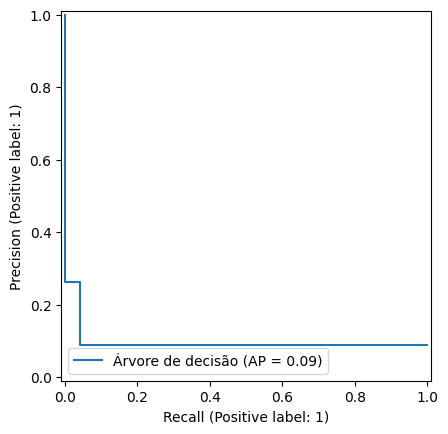

In [110]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

Fazendo a leitura do gráfico: O modelo não está conseguindo equilibrar bem as duas tarefas, detectar eficientemente os clientes inadimplentes, tanto para não perder clientes quanto para evitar vendas para clientes que não pagarão.

Métrica Average Precision (AP, precisão média)

A partir do gráfico também, podemos extrair uma métrica, conhecida como AP (Average Precision) ou precisão média. Obtivemos um valor de 0,09. Quanto mais próximo de 0 for essa métrica, pior será o desempenho do modelo. E quanto mais próximo de 1, melhor será o desempenho do modelo.

Portanto, além da curva que analisamos, podemos perceber que na métrica nosso modelo também não está se saindo bem. E podemos extrair essa métrica de forma isolada, sem ser a partir do gráfico.

In [111]:
from sklearn.metrics import average_precision_score

In [112]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09461940373238367


Conclusão

Agora, exploramos diversas métricas e gráficos que nos permitem analisar o desempenho do modelo.

Até agora, temos calculado as métricas de forma individual, mas elas ainda não estão próximas o suficiente para uma visualização eficaz.

### Módulo 2 - Métricas de avaliação - Aula 8 - Relatórios de métricas

Classification-report

Existe uma função dentro da biblioteca Scikit-Learn para isso, chamada classification_report. Essa função é capaz de gerar um relatório com as principais métricas de classificação.

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



Conclusão:

O modelo apresentou boa performance na classe 0 (adimplentes), com alta precisão, recall e F1-score. Já para a classe 1 (inadimplentes), o desempenho foi fraco, especialmente no recall (0.04) e F1-score (0.07), reflexo do forte desequilíbrio entre as classes. A acurácia geral (0.91) está inflada por esse desequilíbrio. As métricas macro representam médias simples entre as classes, enquanto as weighted (médias ponderadas) são ponderadas pelo número de exemplos. Isso evidencia que o modelo prioriza a classe majoritária.

### Módulo 3 - Validação cruzada - Aula 2 - Usando o KFold

In [115]:
from sklearn.model_selection import cross_validate, KFold

In [ ]:
# Realizar a validação cruzada
modelo = DecisionTreeClassifier(max_depth = 10)
# Definir o KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.69662166, 0.36562824, 0.37235546, 0.36051178, 0.3806181 ]),
 'score_time': array([0.00964952, 0.00617409, 0.0053134 , 0.00508785, 0.00471568]),
 'test_score': array([0.91322809, 0.90777439, 0.90755662, 0.91365418, 0.89917247])}

In [ ]:
# Obter a acurácia média dos resultados da validação cruzada
cv_resultados['test_score']

array([0.91322809, 0.90777439, 0.90755662, 0.91365418, 0.89917247])

In [ ]:
# Obter o intervalo de confiança dos resultados da validação cruzada
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8978046604366616, 0.9187496414758263]


### Módulo3 - Validação cruzada - Aula 4 - Validação cruzada com recall

In [ ]:
# Definir função para calcular o intervalo de confiança
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [120]:
# Realizar a validação cruzada com recall
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.75621676, 0.3841393 , 0.45167208, 0.42654753, 0.37312388]),
 'score_time': array([0.01632524, 0.00992703, 0.01257753, 0.00909042, 0.0092988 ]),
 'test_score': array([0.02642008, 0.0210396 , 0.0196802 , 0.01697128, 0.02427746])}

In [121]:
# Obter a acurácia média dos resultados da validação cruzada
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.014996616930960369, 0.028358829486387162]


### Módulo 3 - Validação Cruzada - Aula 5 - Desafio: validação com outras métricas

É sempre importante analisar o problema de negócio antes de avaliar um modelo de classificação, para que seja escolhida a métrica mais adequada. No nosso projeto, estamos classificando clientes inadimplentes de uma locadora de veículos e identificamos que a métrica mais relevante é o recall, que busca minimizar a quantidade de pessoas inadimplentes que são classificadas como adimplentes.

Para obter um resultado completo das métricas na validação cruzada assim como o classification_report, é preciso utilizar o método cross_validate e informar no parâmetro scoring as métricas a serem avaliadas.

Como desafio, construa um código para gerar o intervalo de confiança para cada uma das métricas com a utilização da validação cruzada:

Acurácia
Recall
Precisão
F1-score
Uma dica é explorar a documentação do método cross_validate a partir deste material de apoio, onde você pode descobrir uma forma mais simples de retornar as métricas de uma só vez com uma lista de strings.

In [ ]:
# Definir o modelo e realizar a validação cruzada com múltiplas métricas
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.83523774, 0.41732502, 0.38351226, 0.37547755, 0.39495301]),
 'score_time': array([0.02434039, 0.0181098 , 0.02310586, 0.02073336, 0.0255301 ]),
 'test_accuracy': array([0.91301034, 0.90744774, 0.90799216, 0.91332753, 0.90004355]),
 'test_recall': array([0.02642008, 0.02227723, 0.02091021, 0.01436031, 0.02543353]),
 'test_precision': array([0.24390244, 0.23076923, 0.25757576, 0.21153846, 0.22680412]),
 'test_f1': array([0.0476758 , 0.04063205, 0.03868032, 0.02689487, 0.04573805])}

In [ ]:
# Definir função para relatar as métricas
def relatorio_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [ ]:
# Relatar as métricas
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.8987130369865771, 0.9180154904375103]
Intervalo de confiança(test_recall): [0.013353426952938096, 0.030407115212097366]
Intervalo de confiança(test_precision): [0.2028700363645117, 0.2653659686831604]
Intervalo de confiança(test_f1): [0.025344779290961628, 0.05450365611415499]


### Módulo 3 - Validação cruzada - Aula 6 - Estratificando os dados

In [ ]:
# Fazer a contagem de valores da coluna 'inadimplente'
dados['inadimplente'].value_counts(normalize = True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [126]:
from sklearn.model_selection import StratifiedKFold

In [127]:
# Definir o modelo e realizar a validação cruzada com recall
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

In [128]:
# Obter a acurácia média dos resultados da validação cruzada
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.020576471601502003, 0.03828947215334309]


### Módulo 4 - Balanceamento de dados - Aula 2 - Oversampling

A estratégia de oversampling consiste em aumentar a quantidade de dados da classe que possui menor frequência até que tenha a mesma quantidade da classe de maior frequência. Dessa maneira, o modelo se atentará mais para o padrão dos dados da classe que tinha menor frequência a princípio e poderá diferenciar melhor as duas classes.

Para aumentar a quantidade de dados precisamos gerar novos registros na base de dados. É possível utilizar um oversampling aleatório para duplicar registros de maneira randômica ou usar uma técnica como o SMOTE para gerar dados sintéticos com um padrão próximo dos dados existentes. A desvantagem dessa estratégia é a possibilidade de overfitting do modelo, principalmente ao ser utilizado o oversampling aleatório. Nesse caso, o modelo pode se especializar demais no padrão dos dados que são muito parecidos ou idênticos, já que são copiados ou gerados sinteticamente.

In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
# Aplicar o SMOTE para balancear os dados
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [131]:
# Verificar a contagem de valores da coluna 'inadimplente' após o balanceamento
y_balanceado.value_counts(normalize = True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [132]:
# Criar o modelo e realizar a validação cruzada com recall após o balanceamento
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

In [ ]:
# Obter o intervalo de confiança dos resultados da validação cruzada
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6825114780650018, 0.7572657090266318]


### Módulo 4 - Balanceamento de dados - Aula 5 - Pipeline para validação

Geralmente, em projetos de machine learning, são necessárias etapas de transformação de dados para obtenção de modelos mais eficientes. A sequência de execução de todas as transformações e ajustes do modelo é conhecida como pipeline.

O pipeline é utilizado para realizar a transformação nos dados em cada uma das divisões de forma independente, além disso a transformação de oversampling é realizada somente nos dados de treino, mantendo a proporção original dos dados reais no conjunto de validação.

In [134]:
from imblearn.pipeline import Pipeline as imbpipeline

In [135]:
# Criar o modelo e realizar a validação com SMOTE
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [136]:
# Realizar a validação cruzada com recall
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [137]:
# Obter o intervalo de confiança dos resultados da validação cruzada
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.19182020534359323, 0.29559857604251705]


### Módulo 4 - Balanceamento de dados - Aula 7 - Undersampling

A estratégia de undersampling é contrária ao oversampling, e consiste em reduzir a quantidade de dados da classe que possui maior frequência até que tenha a mesma quantidade da classe de menor frequência. Dessa forma, o modelo não dará atenção somente aos dados de maior quantidade e poderá diferenciar melhor as duas classes.

Para reduzir a quantidade de dados, precisamos remover ou deletar registros existentes. É possível utilizar um undersampling aleatório para selecionar os registros que serão mantidos ou usar técnicas que selecionam ou removem dados a partir de um padrão estabelecido. A principal desvantagem da estratégia de undersampling é a de remover dados que podem ser muito importantes para o entendimento do problema, principalmente quando essa remoção é feita sem nenhum critério, como é o caso do undersampling aleatório.

Ambas as estratégias são válidas para a tentativa de melhorar o desempenho de um modelo de classificação, mas devemos ficar atentos ao utilizá-las devido aos pontos negativos que são inerentes a cada um dos métodos. Em qualquer projeto que seja utilizado alguma dessas ferramentas, deve ser feita uma análise para identificar se de fato elas ajudaram ou atrapalharam o desempenho do modelo de classificação.

NearMiss

Ao invés do undersampling aleatório, vamos aplicar outra técnica de undersampling que se chama NearMiss. Nessa estratégia, há um critério de escolher os elementos que vão continuar na base de dados que tenham um padrão bem parecido com os elementos que já existem na outra classe.

In [138]:
from imblearn.under_sampling import NearMiss

In [139]:
# Criar o modelo e realizar a validação com NearMiss
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
# Realizar a validação cruzada com recall
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [140]:
# Obter o intervalo de confiança dos resultados da validação cruzada
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.625519005236599, 0.7029756133978385]


### Módulo 4 - Balanceamento de dados - Aula 9 - Testando o modelo